In [1]:
import numpy as np
import pandas as pd
from data_visualisation import *
from geopy.distance import vincenty

In [112]:
vrf = np.loadtxt('../data/PeMS/Incidents/logit/result/tn.csv', delimiter=',')
data_srs_smoothed = pd.read_csv('../data/PeMS/Series/light/smoothed/d07_text_station_5min_2017_10_09.csv', parse_dates=[0])
data_inc = pd.read_csv('../data/PeMS/Incidents/light/all_text_chp_incident_day_2017_10_09.csv', parse_dates=[3])
stations_active = pd.read_csv('../data/PeMS/Stations/light/d07_text_meta_2017_09_20_active.csv')
data_srs_smoothed_aux = pd.read_csv('../data/PeMS/Series/light/smoothed/d07_text_station_5min_2017_10_11.csv', parse_dates=[0])

In [38]:
def get_stations_closest_to_inc(incID, incs, stations, top=7):
    coords = incs[incs.IncidentID==incID].iloc[0][['Latitude', 'Longitude']]
    result = stations[['ID', 'Latitude', 'Longitude', 'Fwy', 'Dir']].copy()
    result['Distance'] = result.apply(lambda x: vincenty(coords, x[['Latitude', 'Longitude']].tolist()).kilometers, axis=1)
    return result.sort_values('Distance').iloc[:top]

In [39]:
def plot_station_flow(flow_data, station_no, chrstc_to_plot = 'Avg Speed'):
    hours = mdts.HourLocator()
    date = flow_data.Timestamp.iloc[0].day
    month = flow_data.Timestamp.iloc[0].month
    datemin = dt.datetime(year=2017, month=month, day=date, hour=0)
    datemax = dt.datetime(year=2017, month=month, day=date, hour=23)
#     data_srs_no_null = flow_data.dropna(subset=[chrstc_to_plot])
    dates = flow_data[ (flow_data['Station'] == station_no)]['Timestamp']
    speed = flow_data[(flow_data['Station'] == station_no)][chrstc_to_plot]
    fig,ax = plt.subplots(figsize=[15,10])
    fig.figsize = [15,10]
    plt.plot_date(dates, speed, fmt='-', tz='EST')
    ax.xaxis.set_major_locator(hours)
    fig.autofmt_xdate()
    ax.xaxis.set_major_formatter(mdts.DateFormatter('%H:%M'))
    ax.set_xlim(datemin, datemax)
    plt.grid()
    plt.show()

In [89]:
vcnt = 4
loc = 32
data_inc.loc[loc-vcnt:loc+vcnt].drop(['Incident_No', 'Zoom_Map', 'TBxy', 'CC_Code', 'District', 'Latitude', 'Longitude', 'CountryFIPS_ID', 'CityFIPS_ID'], axis=1)

,IncidentID,Timestamp,Description,Location,Area,Freeway,Freeway_direction,State_postmile,Absolute_postmile,Severity,Duration
28,17516042,2017-10-09 04:08:00,1125-Traffic Hazard,Sr118 E / Eo Rocky Peak Fire Rd,West Valley,118,E,R0.069,33.6,NaN,0.0
29,17516049,2017-10-09 04:18:00,1182-Trfc Collision-No Inj,I5 S / Stadium Way,Central LA,5,S,21.93,138.5,NaN,6.0
30,17516050,2017-10-09 04:17:00,1125-Traffic Hazard,I10 W / Kellogg Hill,Baldwin Park,10,W,41.1,39.6,NaN,5.0
31,17516051,2017-10-09 04:15:00,1183-Trfc Collision-Unkn Inj,I5 S / I5 S Sr110 N Con,Central LA,5,S,20.63,137.2,NaN,105.0
32,17516054,2017-10-09 04:21:00,1183-Trfc Collision-Unkn Inj,I5 S / Glendale Blvd,Central LA,5,S,23.63,140.2,NaN,2.0
33,17516055,2017-10-09 04:23:00,1125-Traffic Hazard,I210 W Eo / Mountain Ave,Rancho Cucamonga,210,W,1.861,54.3,NaN,2.0
34,17516061,2017-10-09 04:26:00,1183-Trfc Collision-Unkn Inj,I5 S / I5 S Sr2 W Con,Central LA,5,S,22.83,139.4,NaN,2.0
35,17516064,2017-10-09 04:33:00,1125-Traffic Hazard,I10 W / S Hoover St,Central LA,10,W,14.255,12.1,NaN,1.0
36,17516068,2017-10-09 04:34:00,SIG Alert,I5 S / Sr2 W I5 S Con,Central LA,5,S,21.83,138.4,NaN,6.0


In [122]:
data_inc[data_inc.IncidentID.isin(vrf[:,0])].drop(['Incident_No', 'Zoom_Map', 'TBxy', 'CC_Code', 'District', 'Latitude', 'Longitude', 'CountryFIPS_ID', 'CityFIPS_ID'], axis=1).iloc[200:250]

,IncidentID,Timestamp,Description,Location,Area,Freeway,Freeway_direction,State_postmile,Absolute_postmile,Severity,Duration
233,17516966,2017-10-09 12:24:00,1125-Traffic Hazard,I10 W / Garfield Ave,East LA,10,W,24,22.5,NaN,2.0
235,17516986,2017-10-09 12:41:00,1182-Trfc Collision-No Inj,Sr134 E / S Buena Vista Dr,Altadena,134,E,2.9,2.9,NaN,28.0
237,17516988,2017-10-09 12:37:00,20002-Hit and Run No Injuries,I405 S / I405 N Us101 N Con,West Valley,405,S,39.528,63.3,NaN,2.0
238,17516989,2017-10-09 12:36:00,FIRE-Report of Fire,I210 E / Sunland Blvd,Altadena,210,E,R11.1,11.1,NaN,22.0
239,17517009,2017-10-09 12:51:00,DOT-Request CalTrans Notify,I405 S / Sherman Way,West Valley,405,S,42.428,66.2,NaN,66.0
240,17517010,2017-10-09 12:49:00,1125-Traffic Hazard,I110 S / I10 W,LAFSP,110,S,21.47,21.4,NaN,24.0
241,17517011,2017-10-09 12:48:00,1125-Traffic Hazard,I110 S / I10 W,Central LA,110,S,21.47,21.4,NaN,22.0
242,17517012,2017-10-09 12:47:00,1125-Traffic Hazard,Sr91 E / Carmenita Rd,Santa Fe Springs,91,E,R20.502,14.5,NaN,16.0
243,17517016,2017-10-09 12:49:00,1125-Traffic Hazard,Sr91 E / Carmenita Rd,LACC,91,E,R20.502,14.5,NaN,7.0
244,17517028,2017-10-09 13:00:00,1125-Traffic Hazard,I5 N / Colorado St Ofr,Central LA,5,N,25.567,142.2,NaN,30.0


In [132]:
incID = 17517098
print(vrf[:,1][vrf[:,0]==incID])

stID = vrf[:,1][vrf[:,0]==incID][0]
n_stID = get_next_downstream_station(stations_active,stID,data_inc, incID).ID.iloc[0]
get_next_downstream_station(stations_active,stID,data_inc, incID)

[ 773656.  759422.  760063.  764598.  766875.]


,ID,Fwy,Dir,District,County,City,State_PM,Abs_PM,Latitude,Longitude,Length,Type,Lanes,Name,Distance
0,760074,105,E,7,37,32548.0,R3.1,3.1,33.933294,-118.351898,0.39,ML,4,HAWTHORNE,0.004788
1,760080,105,E,7,37,32548.0,R3.6,3.6,33.930073,-118.344285,0.55,ML,3,IMPERIAL 3,0.012401
2,716414,105,E,7,37,36546.0,R4.2,4.2,33.924911,-118.335537,0.50,ML,4,YUKON,0.021149


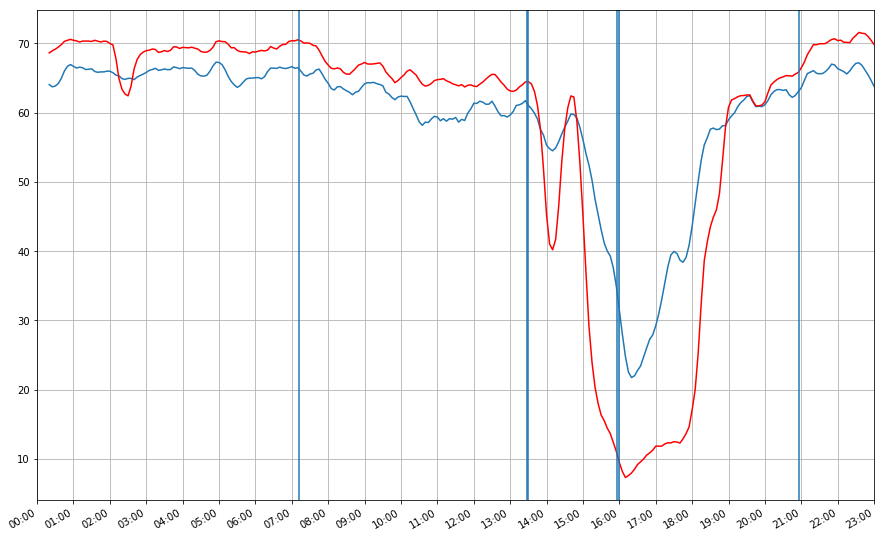

In [133]:
plot_two_station_data_w_nearest_incds(data_srs_smoothed, data_inc, stations_active, stID, n_stID,vicinity_km=3, chrstc_to_plot = 'Avg Speed')

In [69]:
data_inc[(data_inc['Freeway']==71) & (data_inc.Timestamp.dt.hour>=14)]

,IncidentID,CC_Code,Incident_No,Timestamp,Description,Location,Area,Zoom_Map,TBxy,Latitude,Longitude,District,CountryFIPS_ID,CityFIPS_ID,Freeway,Freeway_direction,State_postmile,Absolute_postmile,Severity,Duration
457,17518060,LAHB,171009,2017-10-09 21:30:00,1125-Traffic Hazard,Sr71 S Sr60 E Con / Sr60 E,Baldwin Park,NaN,NaN,34.024293,-117.740539,7,37.0,58072.0,71,S,R0.05,5.0,NaN,14.0


In [81]:
get_stations_closest_to_inc(17517894, data_inc, stations_active, top=10)

,ID,Latitude,Longitude,Fwy,Dir,Distance
1086,763689,34.062222,-118.000626,605,S,0.337326
1085,763683,34.062218,-118.000416,605,N,0.349819
291,717157,34.064175,-118.008013,10,W,0.479047
290,717156,34.063981,-118.008051,10,E,0.485273
1366,768173,34.065326,-117.997535,10,E,0.496910
1367,768174,34.065536,-117.997551,10,W,0.499594
692,717945,34.055560,-118.003436,605,N,1.007847
292,717160,34.066554,-117.990356,10,W,1.173158
694,717951,34.074896,-117.998897,605,S,1.195545
143,716834,34.053746,-118.004464,605,N,1.216748


In [82]:
get_next_downstream_station(incidentID=17517894, incidents=data_inc, stationID=717156, stations=stations_active)

,ID,Fwy,Dir,District,County,City,State_PM,Abs_PM,Latitude,Longitude,Length,Type,Lanes,Name,Distance
0,768173,10,E,7,37,3666.0,31.3,29.8,34.065326,-117.997535,0.655,ML,4,E OF 605,0.010516
1,775552,10,E,7,37,3666.0,32,30.5,34.066974,-117.985481,0.505,ML,5,S/B 605 TO E/B 10,0.022570


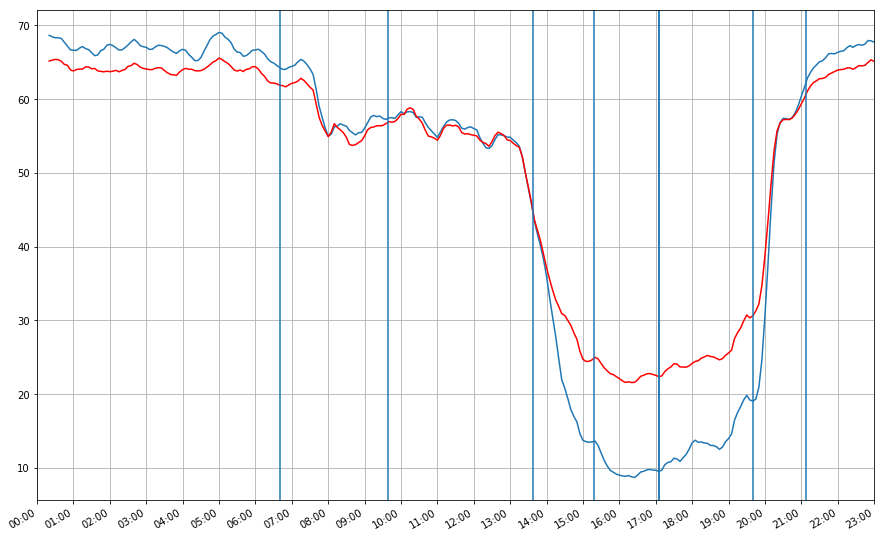

In [83]:
plot_two_station_data_w_nearest_incds(data_srs_smoothed, data_inc, stations_active, 717156, 768173,vicinity_km=3, chrstc_to_plot = 'Avg Speed')

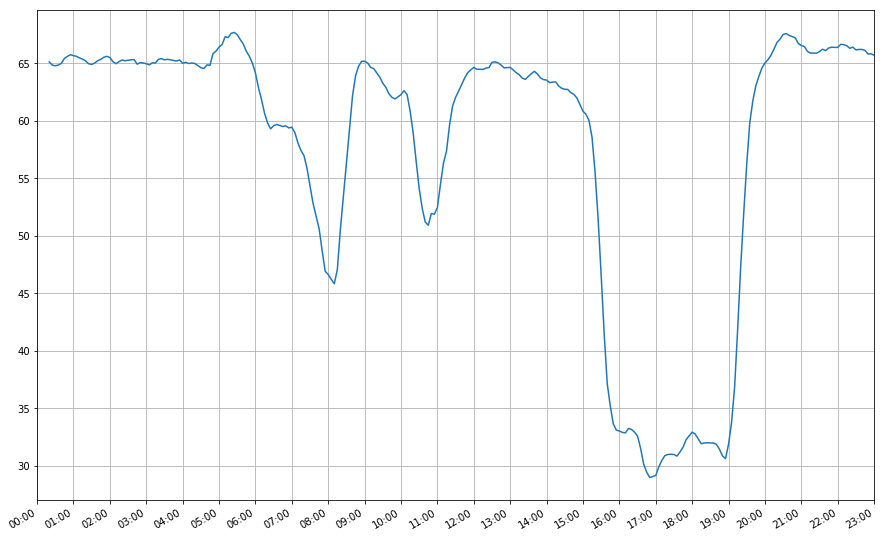

In [53]:
plot_station_flow(flow_data=data_srs_smoothed_aux, station_no=763304)

In [134]:
data_inc.head()

,IncidentID,CC_Code,Incident_No,Timestamp,Description,Location,Area,Zoom_Map,TBxy,Latitude,Longitude,District,CountryFIPS_ID,CityFIPS_ID,Freeway,Freeway_direction,State_postmile,Absolute_postmile,Severity,Duration
0,17515859,LAHB,171009,2017-10-09 00:07:00,CFIRE-Car Fire,I605 N / Carson St,Santa Fe Springs,NaN,NaN,33.831375,-118.083900,7,37.0,43000.0,605,N,R1.748,3.8,NaN,66.0
1,17515869,LAHB,171009,2017-10-09 00:22:00,1125-Traffic Hazard,I405 N / Santa Fe Ave,South LA,NaN,NaN,33.825503,-118.215632,7,37.0,43000.0,405,N,8.028,31.8,NaN,3.0
2,17515870,LAHB,171009,2017-10-09 00:19:00,1125-Traffic Hazard,I405 N / Hawthorne Blvd,South LA,NaN,NaN,33.884661,-118.352382,7,37.0,40886.0,405,N,17.628,41.4,NaN,4.0
3,17515874,LAHB,171009,2017-10-09 00:26:00,FIRE-Report of Fire,I5 N / Lakewood Blvd Onr,Santa Fe Springs,NaN,NaN,33.959368,-118.113680,7,37.0,19766.0,5,N,8.467,125.1,NaN,24.0
4,17515875,LAHB,171009,2017-10-09 00:25:00,20001-Hit and Run w/Injuries,I5 N / Norwalk Blvd,Santa Fe Springs,NaN,NaN,33.912225,-118.073405,7,37.0,52526.0,5,N,4.367,121.0,IN,15.0


In [135]:
det =  pd.read_csv('../data/PeMS/Incidents/light/all_text_chp_incident_det_day_2017_10_11.csv', parse_dates=[2])

In [148]:
det_ids = det.ID.unique()

In [137]:
gb = det.groupby(['ID'])

In [143]:
det_desc = gb['Desc'].apply(', '.join)

In [153]:
det_desc[det_ids[0]]

'[2] SIGALERT: NB I-5 NORTH OF INDIANA ST  #1-4 LANES BLOCKED FOR UNKNOWN DURATION DUE TO A COLLISION- REF LOG 4177, [1] MEDIA LOG FOR OCTOBER 11  2017, Unit Assigned, Unit At Scene, [3] SIGALERT CANCELLATION: NB I-5 NORTH OF INDIANA ST  ALL LANES NOW OPEN- REF LOG 4177, [4] ^NO CHP SIGALERTS IN LOS ANGELES COUNTY, [5] SIGALERT: EB I-210 EAST OF SUNLAND  #3 4 LANES BLOCKED FOR UNKNOWN DURATION DUE TO A STALLED BIG RIG- REF LOG 316, [6] SIGALERT CANCELLATION: EB I-210 EAST OF SUNLAND  ALL LANES NOW OPEN- REF LOG 316, [7] ^NO CHP SIGALERTS IN LOS ANGELES COUNTY, [8] SIGALERT: WB SR-126 AT CHIQUITO CYN RD THE #2 LANE WILL BE CLOSED FOR APPROX 2 HRS DUE TO A GRAVEL SPILL -- REF LOG 486, [9] SIGALERT (PALMDALE): BOUQUET CYN RD SOUTH OF ELIZABETH LAKE RD CLOSED FOR 1 HOUR DUE TO A FATAL TRAFFIC COLLISION -- REF LOG 464, [10] SIGALERT CANCELLATION: BOUQET CYN RD SOUTH OF ELIZABETH LAKE RD ALL LANES NOW OPEN -- REF LOG 464, [11] SIGALERT UPDATE: WB SR-126 AT CHIQUITO CYN RD THE #2 LANE WILL RE

In [161]:
data_inc.dropna(subset=['Severity'])

,IncidentID,CC_Code,Incident_No,Timestamp,Description,Location,Area,Zoom_Map,TBxy,Latitude,Longitude,District,CountryFIPS_ID,CityFIPS_ID,Freeway,Freeway_direction,State_postmile,Absolute_postmile,Severity,Duration
4,17515875,LAHB,171009,2017-10-09 00:25:00,20001-Hit and Run w/Injuries,I5 N / Norwalk Blvd,Santa Fe Springs,NaN,NaN,33.912225,-118.073405,7,37.0,52526.0,5,N,4.367,121.0,IN,15.0
